In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
from statistics import mean, median
import xml.etree.ElementTree as et
import collections
import string
from collections import Counter
import helper_functions

# Georgia 2020 State Senate Election Results

## Election Results Documentation:

Election results from the Georgia Secretary of State Elections Division (https://sos.ga.gov/index.php/Elections/current_and_past_elections_results). Presidential recount results from the Georgia Secretary of State Elections Division via Reuters.

## Shapefile Source Documentation:

Precinct shapefile primarily from the Georgia General Assembly Reapportionment Office (http://www.legis.ga.gov/Joint/reapportionment/en-US/default.aspx).  
Cobb, DeKalb, and Gwinnett counties instead use shapefiles from the U.S. Census Bureau's 2020 Redistricting Data Program.  
Forsyth and Fulton use shapefiles sourced from the respective counties.

## Shapefile Modifications Documentation:

Three of the four VTDs in Chattahoochee County are comprised of Fort Benning. However, the county only reports one polling location for all voters, including residents of Fort Benning that vote within the county. The four Chattahoochee County VTDs have therefore been merged in the shapefile.

The following additional modifications reflect changes made prior to the 2020 general election.

Barrow: Merge 2/15, 3/12, 4/14, 5/7, 6/10/13, 8/9, 11/16; Adjust new 2/13 boundary  
Bartow: Split Cassville/Hamilton Crossing  
Candler: Merge Candler/Metter as Jack Strickland Comm Center  
Chatham: Split 7-7/8-16, 7-12/7-16; Realign 7-06C/7-07C  
Chatooga: Split Cloudland/Teloga along ridgeline that marks boundary between them with the USGS Topographic Contour shapefile  
Clayton: Split Ellenswood 1/2, Jonesboro 1/17/19, Lovejoy 3/6/7, Morrow 3/11, 5/10, Oak 3/5   
Cobb: Split Bells Ferry 3/4, Dobbins 1/2, Marietta 3A/3B, Smyrna 3A/3B  
Columbia: Split Bessie Thomas/2nd Mt Moriah, Harlem Branch/Harlem Senior Ctr; Merge Blanchard Park/MTZ Col FD;  Align multiple precincts with county maps  
Coweta: Merge Arts Centre/Jefferson Parkway as Newnan Centre  
Fulton: Merge CP07A/CP07D, CH01/CH04B, SS29A/SS29B, UC031/UC035  
DeKalb: Split Clarkston/Clarkston Comm Ctr; Realign Decatur/Oakhurst; Align precincts with Atlanta, Brookhaven, Decatur, Tucker city limits   
Gwinnett: Adjust Baycreek F/G, Berkshire J/M, Cates D/F, Garners C/B, Lawrenceville G/N, Pinckneyville S/T, Rockbridge A/G  
Lowndes: Split Northgate Assembly/Trinity, Jaycee/Mt Calvary/Northside/VSU  
Oconee: Merge Annex/City Hall; Align City Hall with Watkinsville city limits  
Paulding: Reorganize 12 precincts into 19 precincts as redrawn in 2019  
Randolph: Merge Carnegie/Cuthbert-Courthouse, 4th District/Fountain Bridge/Shellman  
Troup: Split Mountville between Gardner Newman/Hogansville/Rosemont; Align multiple precincts with county maps  
Towns: Merge Macedonia/Tate City  
Wilkes: Align 1/2A boundary with the voter file    
Note that the leading zeros in the Paulding County precinct IDs are included in some election reports and omitted in others. The shapefile includes the leading zeros consistent with the voter file.

## Candidate List

- GSU01RWAT                          Ben Watson (I) (Rep)
- GSU02DJAC              Lester G. Jackson, III (I) (Dem)
- GSU03RMCN                          Sheila McNeill (Rep)
- GSU04RHIC                       Billy Hickman (I) (Rep)
- GSU05DRAH                       Sheikh Rahman (I) (Dem)
- GSU06DJOR             Jennifer ""Jen"" Jordan (I) (Dem)
- GSU06RLAN                          Harrison Lance (Rep)
- GSU07RHAR                        Tyler Harper (I) (Rep)
- GSU08DGEA                              Treva Gear (Dem)
- GSU08RGOO                            Russ Goodman (Rep)
- GSU09DMER                           Nikki Merritt (Dem)
- GSU09RMAR                    P. K. Martin, IV (I) (Rep)
- GSU10DJON                       Emanuel Jones (I) (Dem)
- GSU11RBUR                          Dean Burke (I) (Rep)
- GSU12DSIM                 Freddie Powell Sims (I) (Dem)
- GSU12RTAY                            Tracy Taylor (Rep)
- GSU13DEGL                              Mary Egler (Dem)
- GSU13RSUM                   Carden H. Summers (I) (Rep)
- GSU14DJOH                          Travis Johnson (Dem)
- GSU14RTHO                      Bruce Thompson (I) (Rep)
- GSU15DHAR                         Ed Harbison (I) (Dem)
- GSU16DJES                          Cinquez Jester (Dem)
- GSU16RHAR                        Marty Harbin (I) (Rep)
- GSU17DROS                              Kelly Rose (Dem)
- GSU17RSTR                    Brian Strickland (I) (Rep)
- GSU18RKEN                     John F. Kennedy (I) (Rep)
- GSU19RTIL                       Blake Tillery (I) (Rep)
- GSU20DJOH                 Julius Newberry Johnson (Dem)
- GSU20RWAL                        Larry Walker (I) (Rep)
- GSU21RBEA                       Brandon Beach (I) (Rep)
- GSU22DJON                 Harold V. Jones, II (I) (Dem)
- GSU23DSMI                           Ceretta Smith (Dem)
- GSU23RBUR                               Max Burns (Rep)
- GSU24RAND                        Lee Anderson (I) (Rep)
- GSU25DBRI                        Veronica Brinson (Dem)
- GSU25RJON                          Burt Jones (I) (Rep)
- GSU26DLUC                 David E. Lucas, Sr. (I) (Dem)
- GSU27DGRI                        Brooke Griffiths (Dem)
- GSU27RDOL                        Greg Dolezal (I) (Rep)
- GSU28RBRA                          Matt Brass (I) (Rep)
- GSU29RROB                     Randy Robertson (I) (Rep)
- GSU30DEDW                        Montenia Edwards (Dem)
- GSU30RDUG                          Mike Dugan (I) (Rep)
- GSU31DSMI                            Tianna Smith (Dem)
- GSU31RANA                        Jason Anavitarte (Rep)
- GSU32DTRI                      Christine Triebsch (Dem)
- GSU32RKIR                     Kay Kirkpatrick (I) (Rep)
- GSU33DRHE                       Michael Rhett (I) (Dem)
- GSU34DSEA                    Valencia M. Seay (I) (Dem)
- GSU35DJAM                      Donzella James (I) (Dem)
- GSU36DORR                          Nan Orrock (I) (Dem)
- GSU37DPAR                          Vanessa Parker (Dem)
- GSU37RTIP                     Lindsey Tippins (I) (Rep)
- GSU38DTAT                       Horacena Tate (I) (Dem)
- GSU40DHAR                       Sally Harrell (I) (Dem)
- GSU40RGUA                              Garry Guan (Rep)
- GSU41DJAC                             Kim Jackson (Dem)
- GSU41RFRE                    William Park Freeman (Rep)
- GSU42DPAR                        Elena Parent (I) (Dem)
- GSU43DAND                   Tonya P. Anderson (I) (Dem)
- GSU43RWIL                        Melanie Williams (Rep)
- GSU44DDAV                      Gail Davenport (I) (Dem)
- GSU44RBRO                         Benjamin Brooks (Rep)
- GSU45DJON                          Matielyn Jones (Dem)
- GSU45RDIX                             Clint Dixon (Rep)
- GSU46DPER                           Zachary Perry (Dem)
- GSU46RCOW                        Bill Cowsert (I) (Rep)
- GSU47DJOH                            Dawn Johnson (Dem)
- GSU47RGIN                          Frank Ginn (I) (Rep)
- GSU48DAU                             Michelle Au (Dem)
- GSU48RREE                             Matt Reeves (Rep)
- GSU49RMIL           Cecil T. ""Butch"" Miller (I) (Rep)
- GSU50DDAL                               Dee Daley (Dem)
- GSU50RHAT                             Bo Hatchett (Rep)
- GSU51DKRI                              June Krise (Dem)
- GSU51RGOO                         Steve Gooch (I) (Rep)
- GSU52DDEY                         Charles DeYoung (Dem)
- GSU52RHUF                    Chuck Hufstetler (I) (Rep)
- GSU53RMUL                         Jeff Mullis (I) (Rep)
- GSU54RPAY                         Chuck Payne (I) (Rep)
- GSU55DBUT                    Gloria S. Butler (I) (Dem)
- GSU56DBEE                            Sarah Beeson (Dem)
- GSU56RALB                         John Albers (I) (Rep)
- PSU39DFOR                                      Zan Fort
- PSU39DHAL                                 Sonya Halpern
- PSU39DPOT                                 Jo Anna Potts
- PSU39DPRI                               Linda Pritchett

## Election Results Processing

### Load the modified VEST file

Note: This is the modified version of the file created in the statewide notebook

In [2]:
vest_ga_20 = gp.read_file("./raw-from-source/VEST/cleaned_ga_2020/cleaned_ga_2020.shp")
print(vest_ga_20.shape)

(2678, 50)


In [3]:
# Take a look
vest_ga_20.head(1)

#Create a list of the race columns
data_columns = [i for i in vest_ga_20.columns if (("20" in i) | ("21" in i))]
print(data_columns)

['G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'C20PRERTRU', 'C20PREDBID', 'C20PRELJOR', 'G20USSRPER', 'G20USSDOSS', 'G20USSLHAZ', 'S20USSRLOE', 'S20USSRCOL', 'S20USSRGRA', 'S20USSRJAC', 'S20USSRTAY', 'S20USSRJOH', 'S20USSDWAR', 'S20USSDJAC', 'S20USSDLIE', 'S20USSDJOH', 'S20USSDJAM', 'S20USSDSLA', 'S20USSDWIN', 'S20USSDTAR', 'S20USSLSLO', 'S20USSGFOR', 'S20USSIBUC', 'S20USSIBAR', 'S20USSISTO', 'S20USSIGRE', 'G20PSCRSHA', 'G20PSCDBRY', 'G20PSCLMEL', 'G20PSCRMCD', 'G20PSCDBLA', 'G20PSCLWIL', 'R21USSRPER', 'R21USSDOSS', 'R21USSRLOE', 'R21USSDWAR', 'R21PSCRMCD', 'R21PSCDBLA']


### 1. Load General Election Data

This data had to be downloaded county-by-county in XML format. The below code parses the XML and grabs the necessary data, adds it to a list, gives it the appropriate column names, and converts the data into a dataframe.

In [4]:
loaded_counties = os.listdir("./raw-from-source/Non_Recount_Results/")
z=[]
for locale in loaded_counties:
    if locale.endswith('.xml'):
        file_string = "./raw-from-source/Non_Recount_Results/"+locale
        xtree = et.parse(file_string)
        xroot = xtree.getroot()
        store_list = []
        county_area = xroot.findall(".//Region")
        for i in county_area:
            county = i.text
        contests = xroot.findall(".//Contest")
        for i in contests:
            contest = i.attrib.get('text')
            lower = i.findall("./Choice")
            for j in lower:
                choice = j.attrib.get('text')
                lower_2 = j.findall("./VoteType")
                for k in lower_2:
                    voting_method = k.attrib.get('name')
                    lower_3 = k.findall("./Precinct")
                    for l in lower_3:
                        precinct_name = l.attrib.get('name')
                        num_votes = l.attrib.get('votes')
                        z.append([county,contest,choice,voting_method,precinct_name,num_votes])
dfcols = ['county','contest','choice','voting_method','precinct','num_votes']
ga_election = pd.DataFrame(z,columns=dfcols)

#Sanity check that there are the right number of counties
print(len(ga_election["county"].unique()))

159


### Update Race Names

In [5]:
race_name_change_dict = {
    'State Senate Dist 5/Senador Estatal Dist 5':'State Senate District 5',
    'State Senate Dist 9/Senador Estatal Dist 9':'State Senate District 9',
    'State Senate Dist 40/Senador Estatal Dist 40':'State Senate District 40',
    'State Senate Dist 41/Senador Estatal Dist 41':'State Senate District 41',
    'State Senate Dist 45/Senador Estatal Dist 45':'State Senate District 45',
    'State Senate Dist 48/Senador Estatal Dist 48':'State Senate District 48',
    'State Senate Dist 55/Senador Estatal Dist 55':'State Senate District 55'
}

ga_election["contest"] = ga_election["contest"].map(race_name_change_dict).fillna(ga_election["contest"])

In [6]:
total_races_list = list(ga_election["contest"].unique())

ga_senate_races = [i for i in total_races_list if "State Senate" in i]


### Filter Down to Relevant Races

In [7]:
ga_election = ga_election[ga_election["contest"].isin(ga_senate_races)]
ga_election.reset_index(inplace=True,drop=True)

### Clean and Pivot Data

In [8]:
#Make sure votes are integers
ga_election["num_votes"] = ga_election["num_votes"].astype(int)

In [9]:
def conditions(x):
    if "(" in x:
        return x[len(x)-4:len(x)-1].upper()
    else:
        #This will happen for the State Senate District 39
        return "DEM"

In [10]:
func = np.vectorize(conditions)
party = func(ga_election["choice"])
ga_election["party"] = party

In [11]:
def district_assigner(x):
    if x =='State Senate District 39 - Special Democratic Primary':
        val = "39"
    elif "District" in x:
        val = x.split( )[len(x.split( ))-1].zfill(2)
    else:
        val =  "n/a"
    return val

In [12]:
func = np.vectorize(district_assigner)
district = func(ga_election["contest"])
ga_election["DISTRICT"] = district

In [13]:
def clean_contest(x):
    if x =='State Senate District 39 - Special Democratic Primary':
        val = "39"
    elif "District" in x:
        val = ' '.join(x.split( )[0:2])
    else:
        val =  x
    return val

In [14]:
func = np.vectorize(clean_contest)
clean_contest_val = func(ga_election["contest"])
ga_election["Clean_Contest"] = clean_contest_val

In [15]:
choice_change_dict = {
    'David E. Lucas, Sr.':'LUC',
    'Harold V. Jones, II':'JON',
    'Lester G. Jackson, III':'JAC', 
    'P. K. Martin, IV':'MAR'
}
        
def get_name(full_name):
    
    if full_name in list(choice_change_dict.keys()):
        return choice_change_dict[full_name]
    else:
        last_name = full_name.split(" ")[-1]
        last_name = last_name.upper()
        return last_name[0:3]

In [16]:
ga_election["cand"] = ga_election["choice"].apply(lambda x:x.split(" (")[0])


In [17]:
ga_election.sort_values(["cand"], inplace = True)

In [18]:
ga_election["cand_abbrev"] =  ga_election["cand"].apply(lambda x: get_name(x))

In [19]:
ga_election["mod_choice"]="GSU"+ga_election["DISTRICT"]+ga_election["party"].str[0]+ga_election["cand_abbrev"]

# Correct the primary election columns
ga_election["mod_choice"] = ga_election["mod_choice"].map({'GSU39DPOT':'PSU39DPOT',
                               'GSU39DPRI':'PSU39DPRI',
                               'GSU39DHAL':'PSU39DHAL',
                              'GSU39DFOR':'PSU39DFOR'}).fillna(ga_election["mod_choice"])

### Create a fields dictionary

In [20]:
fields_dict_upper = dict(zip(ga_election["mod_choice"],ga_election["choice"]))
od = collections.OrderedDict(sorted(fields_dict_upper.items()))
fields_dict_upper_df = pd.DataFrame.from_dict(od, orient ='index')
fields_dict_upper_df.reset_index(inplace = True, drop = False)
fields_dict_upper_df.columns = ['Field_Name', 'Cand_Name']
fields_dict_upper_df.to_csv("./cand_dicts/sldu_fields_dict.csv", index = False)

#### Add a FIPS Column

In [21]:
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Georgia"]
fips_file["FIPS County"] = fips_file["FIPS County"].astype(str)
fips_file["FIPS County"] = fips_file["FIPS County"].str.zfill(3)
fips_file["County Name"] = fips_file["County Name"].replace("De Kalb","DeKalb")
fips_dict = dict(zip(fips_file['County Name'], fips_file['FIPS County']))
ga_election['county_fips'] = ga_election['county'].map(fips_dict).fillna(ga_election['county'])
ga_election['county_fips'] = ga_election['county_fips'].astype(str)
ga_election['county_fips'] = ga_election['county_fips'].str.zfill(3)

#### Pivot the data

In [22]:
ga_election["unique_ID"] = ga_election["county_fips"]+"-"+ga_election["precinct"]
ga_election["unique_ID"]=ga_election["county_fips"]+ga_election["precinct"]
ga_election=pd.pivot_table(ga_election,index=["unique_ID","county","county_fips","precinct"],columns=["mod_choice"],values=['num_votes'],aggfunc=sum)
ga_election = ga_election.fillna(0)
ga_election.columns = ga_election.columns.droplevel(0)
ga_election = ga_election.reset_index()

### Combine Northgate Assembly and Trinity in Election Results

Note: We perfomed this in the modified version of the VEST file as well. This corrects an issue with votes appearing in a precinct outside of a congressional district. Please see the main file README for more information

In [23]:
to_remove = ga_election[(ga_election["county"]=="Lowndes") & (ga_election["precinct"].isin(["Northgate Assembly", "Trinity"]))]
remaining_elections = ga_election[~((ga_election["county"]=="Lowndes") & (ga_election["precinct"].isin(["Northgate Assembly", "Trinity"])))]

In [24]:
# Print statements to make sure all precincts are counted correctly
print(ga_election.shape)
print(remaining_elections.shape)
print(to_remove.shape)

(2656, 91)
(2654, 91)
(2, 91)


In [25]:
# Combine the two precincts and clean the indices
grouped_to_remove = to_remove.groupby(["county_fips"]).sum()
grouped_to_remove.reset_index(inplace = True, drop = False)

# Add appropriate data columns and filter down to needed columns
grouped_to_remove["unique_ID"] = "185-NORTHGATE ASSEMBLY AND TRINITY"
grouped_to_remove["county"] = 'Lowndes'
grouped_to_remove["county_fips"] = '185' 
grouped_to_remove["precinct"] = 'NORTHGATE ASSEMBLY AND TRINITY'
grouped_to_remove = grouped_to_remove[list(to_remove.columns)]

# Combine the precincts back together
ga_election = pd.concat([remaining_elections, grouped_to_remove])
ga_election.reset_index(inplace = True, drop = True)

## Join Election Results to Shapefiles

#### Try a  unique ID

In [26]:
ga_election["precinct"] = ga_election["precinct"].str.strip().str.upper()
ga_election["unique_ID"]=ga_election["county_fips"]+"-"+ga_election["precinct"]
vest_ga_20["unique_ID"]=vest_ga_20["FIPS2"]+"-"+vest_ga_20["PRECINCT_N"]

#### Check whether there are duplicate IDs

In [27]:
ser_1 = ga_election["unique_ID"].value_counts(dropna=False)
print(ser_1[ser_1 >1])

ser_2 = vest_ga_20["unique_ID"].value_counts(dropna=False)
print(ser_2[ser_2 >1])

Series([], Name: unique_ID, dtype: int64)
NaN                        7
051-ELI WHITNEY COMPLEX    2
Name: unique_ID, dtype: int64


In [28]:
#Look into duplicate IDs - ELI WHITNEY
display(vest_ga_20[vest_ga_20["unique_ID"]=="051-ELI WHITNEY COMPLEX"])

,DISTRICT,CTYSOSID,PRECINCT_I,PRECINCT_N,CTYNAME,CTYNUMBER,CTYNUMBER2,FIPS2,G20PRERTRU,G20PREDBID,...,G20PSCDBLA,G20PSCLWIL,R21USSRPER,R21USSDOSS,R21USSRLOE,R21USSDWAR,R21PSCRMCD,R21PSCDBLA,geometry,unique_ID
2259,0513-15C,0513-15C,3-15C,ELI WHITNEY COMPLEX,CHATHAM,25,025,051,278,361,...,325,15,281,329,282,329,284,318,"POLYGON ((-81.02948 32.06200, -81.03000 32.060...",051-ELI WHITNEY COMPLEX
2261,0512-06C,0512-06C,2-06C,ELI WHITNEY COMPLEX,CHATHAM,25,025,051,65,335,...,301,19,52,312,53,311,54,300,"POLYGON ((-81.05333 32.07291, -81.05336 32.072...",051-ELI WHITNEY COMPLEX


In [29]:
#Assign new unique IDs, adding in PRECINCT_I to differentiate
vest_ga_20.loc[vest_ga_20["CTYSOSID"]=="0513-15C","unique_ID"] = "051-ELI WHITNEY COMPLEX 3-15C"
vest_ga_20.loc[vest_ga_20["CTYSOSID"]=="0512-06C","unique_ID"] = "051-ELI WHITNEY COMPLEX 2-06C"

In [30]:
display(vest_ga_20[vest_ga_20["unique_ID"].isna()])

,DISTRICT,CTYSOSID,PRECINCT_I,PRECINCT_N,CTYNAME,CTYNUMBER,CTYNUMBER2,FIPS2,G20PRERTRU,G20PREDBID,...,G20PSCDBLA,G20PSCLWIL,R21USSRPER,R21USSDOSS,R21USSRLOE,R21USSDWAR,R21PSCRMCD,R21PSCDBLA,geometry,unique_ID
1351,051XFTPU,None,None,None,None,None,None,None,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-80.96828 32.04402, -80.96876 32.044...",NaN
1469,029FTSTEW,None,None,None,None,None,None,None,0,0,...,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((-81.59263 32.10346, -81.59242 ...",NaN
2141,215FTBEN2,None,None,None,None,None,None,None,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-84.93473 32.40556, -84.93448 32.405...",NaN
2144,215FTBEN4,None,None,None,None,None,None,None,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-84.91564 32.42299, -84.90945 32.422...",NaN
2162,215FTBEN3,None,None,None,None,None,None,None,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-84.93783 32.40666, -84.93765 32.406...",NaN
2243,215ZZZZZZ,None,None,None,None,None,None,None,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-84.89892 32.45201, -84.89890 32.452...",NaN
2244,215FTBEN1,None,None,None,None,None,None,None,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((-84.89897 32.44577, -84.89896 32.449...",NaN


In [31]:
vest_ga_20.loc[vest_ga_20['unique_ID'].isna(), 'unique_ID'] = vest_ga_20['DISTRICT']

In [32]:
#Create a dictionary of ID changes
source_vest_id_changes_dict = {'051-1-17C ISLANDS CHRISTIAN CHURCH': '051-ISLANDS CHRISTIAN CHURCH', '051-7-14C COASTAL CATHEDRAL': '051-COASTAL CATHEDRAL', '051-7-07C ROTHWELL BAPTIST CHURCH': '051-ROTHWELL BAPTIST CHURCH', '051-4-07C WILMINGTON ISLAND UMC': '051-WILMINGTON ISLAND UMC', '051-4-08C WILMINGTON ISLAND PRES CHURCH': '051-WILMINGTON ISLAND PRES CHURCH', '051-1-16C FERGUSON AVE BAPTIST': '051-FERGUSON AVE BAPTIST', '051-7-11C SEVENTH DAY ADV CHURCH': '051-SEVENTH DAY ADV CHURCH', '051-7-16C POOLER RECREATION CENTER GYMNASIUM': '051-POOLER REC CENTER GYM', '051-7-08C BLOOMINGDALE COMM CTR': '051-BLOOMINGDALE COMM CTR', '051-4-13C SKIDAWAY ISLAND PRES CHURCH': '051-SKIDAWAY ISLAND PRES CHURCH', '051-6-10C STATION 3': '051-GEORGETOWN ELEMENTARY', '051-4-12C ST PETERS EPISCOPAL': '051-ST PETERS EPISCOPAL', '051-7-13C SOUTHSIDE FIRE TRNG CTR': '051-SOUTHSIDE FIRE TRNG CTR', '051-4-06C FIRST BAPTIST OF THE ISLAND': '051-FIRST BAPTIST OF THE ISLAND', '051-4-04C LIGHTHOUSE BAPTIST CHURCH': '051-LIGHTHOUSE BAPTIST CHURCH', '051-4-05C ST FRANCIS EPISCOPAL CHURCH': '051-ST FRANCIS EPISCOPAL CHURCH', '051-1-12C ISLE OF HOPE BAPTIST': '051-ISLE OF HOPE BAPTIST', '051-4-02C FRANK MURRAY COMM CENTER': '051-FRANK MURRAY COMM CENTER', '051-7-06C POOLER CITY HALL': '051-POOLER CITY HALL', '051-8-16C ROYAL CINEMAS AND IMAX': '051-ROYAL CINEMAS AND IMAX', '051-6-02C WINDSOR FOREST BAPTIST': '051-WINDSOR FOREST BAPTIST', '051-6-11C BAMBOO FARMS': '051-BAMBOO FARMS', '051-4-15C SKIDAWAY ISLAND STATE PARK': '051-SKIDAWAY ISLAND STATE PARK', '051-6-09C TRINITY LUTHERAN CHURCH': '051-TRINITY LUTHERAN CHURCH', '051-1-01C FIRST PRESBYTERIAN CHURCH': '051-FIRST PRESBYTERIAN CHURCH', '051-4-14C SKIDAWAY ISLAND BAPTIST': '051-SKIDAWAY ISLAND BAPTIST', '051-7-12C POOLER CHURCH': '051-POOLER CHURCH', '051-7-10C PROGRESSIVE REC CENTER': '051-PROGRESSIVE REC CENTER', '051-1-06C CENTRAL CHURCH OF CHRIST': '051-CENTRAL CHURCH OF CHRIST', '051-1-14C COMPASSION CHRISTIAN CHURCH': '051-COMPASSION CHRISTIAN CHURCH', '051-6-03C CRUSADER COMM CENTER': '051-CRUSADER COMM CENTER', '051-4-11C TYBEE ISLAND SCHOOL CAFE': '051-TYBEE ISLAND SCHOOL CAFE', '051-7-09C SAVANNAH HOLY C OF G': '051-SAVANNAH HOLY C OF G', '051-4-10C GUARD HOUSE COMM CTR': '051-GUARD HOUSE COMM CTR', '051-1-08C GRACE UNITED METHODIST CHURCH': '051-GRACE UNITED METHODIST CHURCH', '051-1-10C ST THOMAS EPISCOPAL CHURCH': '051-ST THOMAS EPISCOPAL CHURCH', '051-1-05C JEA BUILDING': '051-JEA BUILDING', '051-1-13C THE SANCTUARY': '051-THE SANCTUARY', '051-7-15C RICE CREEK SCHOOL': '051-RICE CREEK SCHOOL', '051-3-12C THUNDERBOLT MUNI COMPLEX': '051-THUNDERBOLT MUNI COMPLEX', '051-3-13C NEW COV 7 DAY ADV CH': '051-NEW COV 7 DAY ADV CH', '051-7-03C PB EDWARDS GYM': '051-PB EDWARDS GYM', '051-7-01C GARDEN CITY SENIOR CTR': '051-GARDEN CITY SENIOR CTR', '051-6-06C THE LIGHT CHURCH': '051-THE LIGHT CHURCH', '051-7-04C LAKE SHORE COMM CTR': '051-LAKE SHORE COMM CTR', '051-6-05C WINDSOR HALL': '051-WINDSOR HALL', '051-3-02C TEMPLE MICKVE ISRAEL': '051-TEMPLE MICKVE ISRAEL', '051-6-01C WHITE BLUFF PRESBYTERIAN': '051-WHITE BLUFF PRESBYTERIAN', '051-5-11C LARGO-TIBET ELEMENTARY': '051-LARGO-TIBET ELEMENTARY', '051-3-14C OGLETHORPE CHARTER ACADEMY': '051-OGLETHORPE CHARTER ACADEMY', '051-6-08C CHRIST MEMORIAL BAPTIST CHURCH': '051-CHRIST MEMORIAL BAPTIST CHURCH', '051-7-05C WOODLAWN BAPTIST CHURCH': '051-WOODLAWN BAPTIST CHURCH', '051-5-08C SAVANNAH PRIMITIVE BC': '051-SAVANNAH PRIMITIVE BC', '051-8-03C SILK HOPE BAPTIST CHURCH': '051-SILK HOPE BAPTIST CHURCH', '051-3-05C ALDERSGATE YOUTH CENTER': '051-ALDERSGATE YOUTH CENTER', '051-3-09C COKESBURY METHODIST': '051-COKESBURY METHODIST', '051-3-15C ELI WHITNEY COMPLEX': '051-ELI WHITNEY COMPLEX 3-15C', '051-8-13C SAVANNAH CHRISTIAN': '051-SAVANNAH CHRISTIAN', '051-5-07C STATION 1': '051-ELKS LODGE', '051-2-09C SALVATION ARMY': '051-SALVATION ARMY', '051-3-10C BIBLE BAPTIST CHURCH': '051-BIBLE BAPTIST CHURCH', '051-2-07C CHRIST COMMUNITY CHURCH': '051-CHRIST COMMUNITY CHURCH', '051-3-08C JENKINS HIGH SCHOOL': '051-JENKINS HIGH SCHOOL', '051-5-06C SEED CHURCH': '051-SEED CHURCH', '051-1-09C IMMANUEL BAPTIST CHURCH': '051-IMMANUEL BAPTIST CHURCH', '051-8-02C HELLENIC CENTER': '051-HELLENIC CENTER', '051-2-11C STILLWELL TOWERS': '051-STILLWELL TOWERS', '051-3-11C SOUTHSIDE BAPTIST CHURCH': '051-SOUTHSIDE BAPTIST CHURCH', '051-2-02C BLACKSHEAR COMMUNITY CENTER': '051-BLACKSHEAR COMMUNITY CENTER', '051-5-01C BARTLETT MIDDLE SCHOOL': '051-BARTLETT MIDDLE SCHOOL', '051-2-05C HOLY SPIRIT LUTHERAN CHURCH': '051-HOLY SPIRIT LUTHERAN CHURCH', '051-2-04C FELLOWSHIP OF LOVE CHURCH': '051-FELLOWSHIP OF LOVE CHURCH', '051-2-12C WILLIAMS COURT APTS': '051-WILLIAMS COURT APTS', '051-3-01C OLD COURTHOUSE': '051-OLD COURTHOUSE', '051-2-03C W W LAW CENTER': '051-W W LAW CENTER', '051-8-12C BEACH HIGH SCHOOL': '051-BEACH HIGH SCHOOL', '051-5-10C TATUMVILLE COMMUNITY CENTER': '051-TATUMVILLE COMMUNITY CENTER', '051-8-15C GARDEN CITY REC CENTER': '051-GARDEN CITY REC CENTER', '051-2-06C ELI WHITNEY COMPLEX': '051-ELI WHITNEY COMPLEX 2-06C', '051-3-03C SAVANNAH HIGH SCHOOL': '051-SAVANNAH HIGH SCHOOL', '051-8-01C CIVIC CENTER': '051-CIVIC CENTER', '051-3-04C FIRST AFRICAN BAPTIST CHURCH': '051-FIRST AFRICAN BAPTIST CHURCH', '051-5-05C LIBERTY CITY COMM CTR': '051-LIBERTY CITY COMM CTR', '051-5-02C SENIOR CITIZENS CENTER': '051-SENIOR CITIZENS CENTER', '051-8-08C RESUR OF OUR LORD CHURCH': '051-RESURRECTION OF OUR LORD CHURCH', '051-8-05C W BROAD ST YMCA': '051-W BROAD ST YMCA', '051-8-06C TOMPKINS REC CENTER': '051-TOMPKINS REC CENTER', '051-8-09C MOSES JACKSON CENTER': '051-MOSES JACKSON CENTER', '051-5-03C BUTLER PRESBYTERIAN CHURCH': '051-BUTLER PRESBYTERIAN CHURCH', '051-8-11C BUTLER ELEMENTARY': '051-BUTLER ELEMENTARY', '051-8-07C WOODVILLE-TOMPKINS TI': '051-WOODVILLE-TOMPKINS TI', '051-8-10C CARVER HEIGHTS COMM CTR': '051-CARVER HEIGHTS COMM CTR', '053-ACTIVITY CENTER': '053-ACTIVITY CENTER (Includes FTBEN 1-3)', '067-POWDERS SPRINGS 1A': '067-POWDER SPRINGS 1A', '067-POWDERS SPRINGS 2A': '067-POWDER SPRINGS 2A', '067-POWDERS SPRINGS 3A': '067-POWDER SPRINGS 3A', '171-CHAPPELL MILL V FD': '171-CHAPPELL MILL VFD', '275-LITTLE OCHLOCKNEE BAPTIST CHURCH': '275-LITTLE OCHLOCKNEE', '299-100': '299-District 1', '299-200A': '299-District 2A', '299-200B': '299-District 2B', '299-300': '299-1231-150B', '299-304': '299-1231-150C', '299-400': '299-1231-151', '299-404': '299-Beach-Bickley', '299-405': '299-Haywood', '299-406': '299-Jamestown', '299-407': '299-Manor', '299-408': '299-Millwood', '299-409': '299-Waresboro', '317-TIGNAL SCH LUNCH RM': '317-TIGNALL SCH LUNCH RM'}

#Apply the changes
ga_election["unique_ID"] = ga_election["unique_ID"].map(source_vest_id_changes_dict).fillna(ga_election["unique_ID"])

In [33]:
#First join attempt
join_attempt_1 = pd.merge(ga_election,vest_ga_20,how="outer",on="unique_ID",indicator=True)
print(join_attempt_1["_merge"].value_counts())

left_only = join_attempt_1[join_attempt_1["_merge"]=="left_only"]
right_only = join_attempt_1[join_attempt_1["_merge"]=="right_only"]

both          2655
right_only      23
left_only        0
Name: _merge, dtype: int64


In [34]:
#Confirm that the unjoined precincts contain zero-votes
empty_precincts = []
for index, row in right_only.iterrows():
    for race in data_columns:
        keep=True
        if (row[race]!=0):
            keep = False
    if(keep):
        empty_precincts.append(row["DISTRICT"])
print(len(empty_precincts))  

23


In [35]:
races = [i for i in list(ga_election.columns) if "GSU" in i or 'PSU' in i]

In [36]:
for val in races:
    join_attempt_1[val] = join_attempt_1[val].fillna(0)
    join_attempt_1[val] = join_attempt_1[val].astype(int)

## Load State Senate Districts

In [37]:
ga_sldu_districts = gp.read_file("./raw-from-source/SLDU_Districts/ga_sldu_2014_to_2021/ga_sldu_2014_to_2021.shp")
ga_sldu_districts = ga_sldu_districts.to_crs(vest_ga_20.crs)
ga_sldu_districts.rename(columns={'DISTRICT':"SLDU_DISTRICT"},inplace=True)

## Look into split precincts

In [38]:
def is_split_precinct(district_assignment_list):
    c = Counter([x[0] for x in district_assignment_list])
    greater_than_one = {x:[y[1] for y in district_assignment_list if y[0]==x] for x, count in c.items() if count > 1}
    if len(greater_than_one)==0:
        return 0
    else:
        return greater_than_one
    
def get_level_dist(column_name):
    if column_name[0:4] == "GSLP":
        level = "SL"
        dist = "004"
    elif column_name[0:3] == "GSL":
        level = "SL"
        dist = column_name[3:6]
    elif column_name[0:3] == "GCO":
        level = "CON"
        dist = column_name[4:6]
    elif column_name[0:3] == "GSU":
        level = "SU"
        dist = column_name[3:5]
    elif column_name[0:3] == "PSU":
        level = "SU"
        dist = column_name[3:5]    
    else:
        print(column_name)
        raise ValueError
    return level,dist

def contains_sldl(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SL":
            return dist_tuple[1]
        
def contains_cong(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "CON":
            return dist_tuple[1]

precinct_mapping_dict = {}
split_precincts_list = {}
for index,row in join_attempt_1.iterrows():
    precinct_list = []
    for contest in races:
        if(row[contest]!=0):
            precinct_info = get_level_dist(contest)
            if precinct_info not in precinct_list:
                precinct_list.append(get_level_dist(contest))
    is_split = is_split_precinct(precinct_list)
    if (is_split):
        split_precincts_list[row["unique_ID"]]=is_split
    precinct_mapping_dict[row["unique_ID"]]=precinct_list

In [39]:
split_precincts_list

{'015-ADAIRSVILLE': {'SU': ['14', '52']},
 '015-CARTERSVILLE EAST': {'SU': ['14', '52']},
 '015-CARTERSVILLE WEST': {'SU': ['14', '52']},
 '015-EMERSON': {'SU': ['14', '52']},
 '021-HOWARD 3': {'SU': ['18', '25']},
 '021-HOWARD 7': {'SU': ['18', '25']},
 '021-RUTLAND 2': {'SU': ['18', '26']},
 '045-ROOPVILLE': {'SU': ['28', '30']},
 '049-AMERICAN LEGION': {'SU': ['03', '07']},
 '049-RACEPOND': {'SU': ['03', '07']},
 '051-THUNDERBOLT MUNI COMPLEX': {'SU': ['01', '02']},
 '057-BASCOMB': {'SU': ['14', '21']},
 '057-BOOTH': {'SU': ['14', '21']},
 '057-LITTLE RIVER': {'SU': ['21', '56']},
 '067-EAST PIEDMONT 01': {'SU': ['33', '37']},
 '067-EASTSIDE 02': {'SU': ['32', '33']},
 '067-ELIZABETH 01': {'SU': ['33', '37']},
 '067-ELIZABETH 04': {'SU': ['32', '33']},
 '067-KENNESAW 1A': {'SU': ['14', '37']},
 '067-MABLETON 02': {'SU': ['33', '38']},
 '067-MARIETTA 1A': {'SU': ['06', '33']},
 '067-MARIETTA 2A': {'SU': ['33', '37']},
 '067-MARIETTA 5B': {'SU': ['33', '37']},
 '067-MARIETTA 6A': {'SU

### Perform the Precinct Splits

In [40]:
ga_sldu_districts["SLDU_DISTRICT"] = ga_sldu_districts["SLDU_DISTRICT"].str[1:3]
join_attempt_1 = gp.GeoDataFrame(join_attempt_1, crs = vest_ga_20.crs)

In [41]:
## Define the "SLDU_DIST" column
def return_sldu(row):
    for val in races:
        if row[val] != 0:
            return val[3:5]
        
join_attempt_1["SLDU_DIST"] = join_attempt_1.apply(lambda row: return_sldu(row), axis = 1)

In [42]:
for val in join_attempt_1["unique_ID"]:
    cd_list = []
    if val in split_precincts_list.keys():
        print(val)
        join_attempt_1 = helper_functions.district_splits_mod(split_precincts_list[val],"SU",val, join_attempt_1, ga_sldu_districts, "unique_ID", "SLDU_DISTRICT", races, "SLDU_DIST")

015-ADAIRSVILLE


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


015-CARTERSVILLE EAST
015-CARTERSVILLE WEST


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


015-EMERSON


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


021-HOWARD 3
021-HOWARD 7
021-RUTLAND 2
045-ROOPVILLE


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


049-AMERICAN LEGION


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


049-RACEPOND
051-THUNDERBOLT MUNI COMPLEX


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


057-BASCOMB
057-BOOTH


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


057-LITTLE RIVER


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-EAST PIEDMONT 01


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-EASTSIDE 02


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-ELIZABETH 01


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 26 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-ELIZABETH 04


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 45 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-KENNESAW 1A


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-MABLETON 02


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 14 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-MARIETTA 1A


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 13 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-MARIETTA 2A


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 7 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-MARIETTA 5B
067-MARIETTA 6A


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 19 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-MARIETTA 7A


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 11 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-NICKAJACK 01


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-OAKDALE 01


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 31 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-OREGON 03
067-PALMER 01


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 12 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-SMYRNA 3B


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 11 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-SMYRNA 4A


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 18 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 29 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


067-SMYRNA 5A
067-SMYRNA 6A
067-TERRELL MILL 01


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 10 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


073-HARLEM BRANCH LIBRARY


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 12 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


073-SECOND MT MORIAH BAPTIST CHURCH


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 44 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


089-AVONDALE


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 12 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


089-BROOKHAVEN
089-DRESDEN ELEM


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 11 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


089-EAST LAKE
089-MCLENDON


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


089-MCNAIR
089-MILLER GROVE


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 7 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


089-PANOLA ROAD


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 7 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


089-PRINCETON ELEM


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 9 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


089-TUCKER LIBRARY


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 14 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


117-06 CROSSROADS
121-CH02


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 11 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


129-RESACA


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


135-BERKSHIRE Q
135-CATES L


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 17 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


135-LAWRENCEVILLE H


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 48 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


135-PINCKNEYVILLE K


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


135-ROCKYCREEK A


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 18 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


139-TADMORE
153-HHPC


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


153-NSES


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


153-RECR


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


153-TMS


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


157-CENTRAL JACKSON


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


169-CLINTON
179-LEWIS FRASIER SCHOOL
179-MEMORIAL DR EAST
179-WALTHOURVILLE


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


215-COLUMBUS TECH
215-EPWORTH UMC


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


215-ST PAUL/CLUBVIEW
223-NEBO ELEM SCHOOL


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


223-TAYLOR FARM PARK


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 11 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


227-JASPER
261-REESE PARK


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


285-LONG CANE
285-ROSEMONT


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 4 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


297-BLASINGAME
315-ABBEVILLE NORTH 2


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


315-ROCHELLE SOUTH 4


/Users/peterhorton/Documents/RDH/erj/erj-ga/2020/general/helper_functions.py:20: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


### Clean the DataFrame and Filter Columns

In [43]:
join_attempt_1.rename(columns = {'unique_ID':"UNIQUE_ID", 'county_fips':'COUNTYFP'}, inplace = True)

In [44]:
join_attempt_1 = join_attempt_1[["UNIQUE_ID", 'COUNTYFP','DISTRICT', 'CTYSOSID', 'PRECINCT_I', 'PRECINCT_N', 'CTYNAME',
       'CTYNUMBER', 'CTYNUMBER2', 'FIPS2','SLDU_DIST']+races+["geometry"]]

### Check the District Assignments

In [45]:
na_values = join_attempt_1[join_attempt_1["SLDU_DIST"].isna()]
others = join_attempt_1[~(join_attempt_1["SLDU_DIST"].isna())]

In [46]:
intersected = gp.overlay(ga_sldu_districts, na_values, how = "intersection")

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_82769/2622600231.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 8 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersected = gp.overlay(ga_sldu_districts, na_values, how = "intersection")


In [47]:
# Create a dictionary to map

intersected['area'] = intersected.area

na_assignment_dict = {}

for val in intersected["UNIQUE_ID"].unique():

    assignment = intersected.loc[intersected["UNIQUE_ID"] == val].nlargest(1, 'area')["SLDU_DISTRICT"].values[0]
    na_assignment_dict[val] = assignment

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_82769/2763017876.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersected['area'] = intersected.area


In [48]:
join_attempt_1["SLDU_DIST"] = join_attempt_1["UNIQUE_ID"].map(na_assignment_dict).fillna(join_attempt_1["SLDU_DIST"])

In [49]:
assigned_districts = join_attempt_1.dissolve(["SLDU_DIST"])
assigned_districts.reset_index(drop=False,inplace=True)

In [50]:
ga_sldu_districts["SLDU_DIST"] = ga_sldu_districts["SLDU_DISTRICT"]

Checking 56 precincts for differences of greater than 0.1 km^2

1) For 04 difference in area is 10.301723070340403
2) For 06 difference in area is 0.12356552551072024
3) For 12 difference in area is 0.5094131396368865
4) For 13 difference in area is 0.5094131396368865
5) For 18 difference in area is 3.076725575708483
6) For 19 difference in area is 10.301723070340403
7) For 28 difference in area is 0.12828075046918055
8) For 33 difference in area is 0.12458433577034483
9) For 35 difference in area is 0.21017807122001467
10) For 37 difference in area is 0.13019497038348882
11) For 39 difference in area is 0.18484225885971148
12) For 40 difference in area is 0.12860984017109003
13) For 41 difference in area is 0.14101157420004487

Scroll down to see plots of any differences

Of the 56 precincts:

11 precincts w/ a difference of 0 km^2
32 precincts w/ a difference between 0 and .1 km^2
8 precincts w/ a difference between .1 and .5 km^2
2 precincts w/ a difference between .5 and 1 km^2
0 p

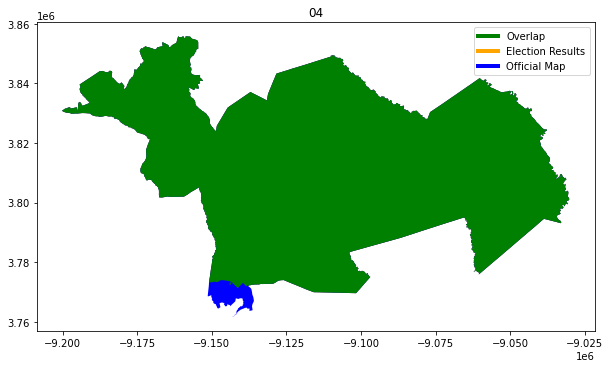

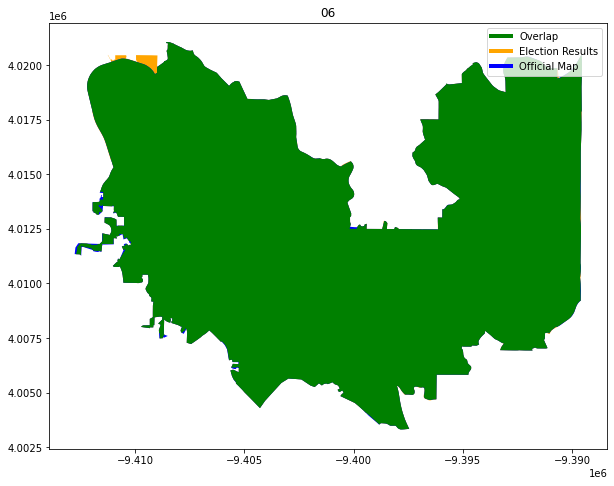

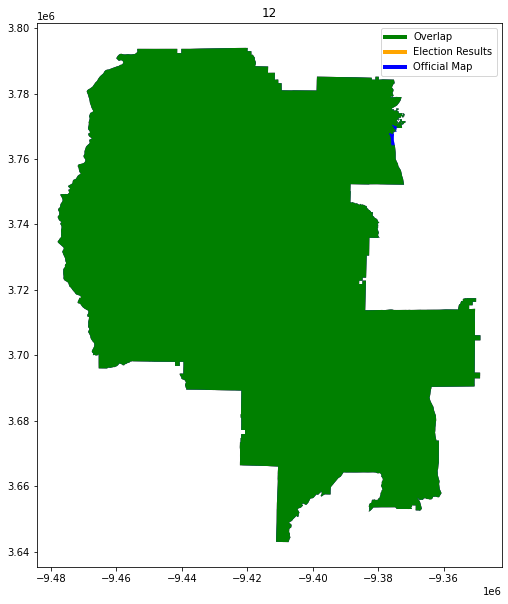

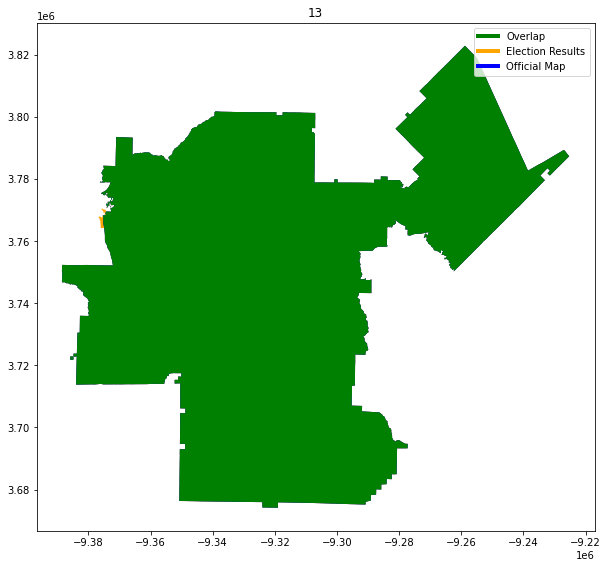

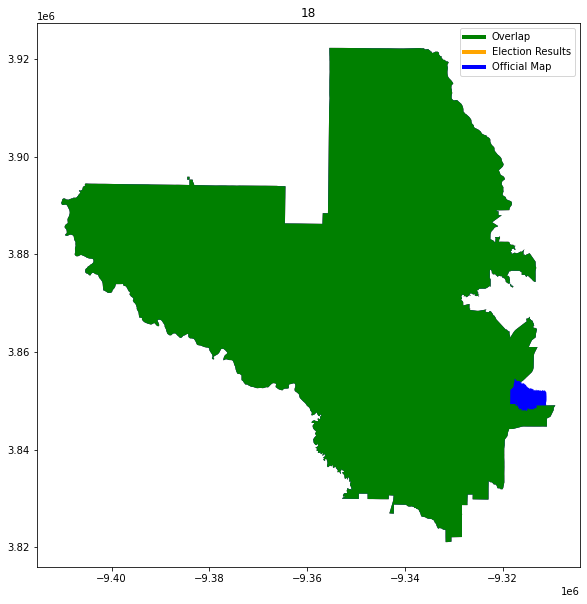

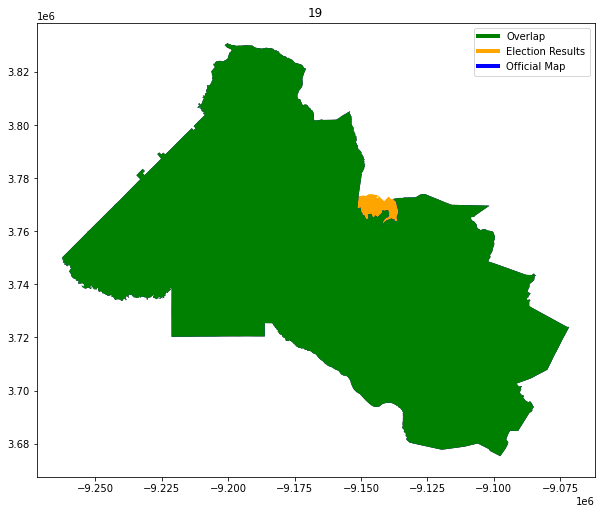

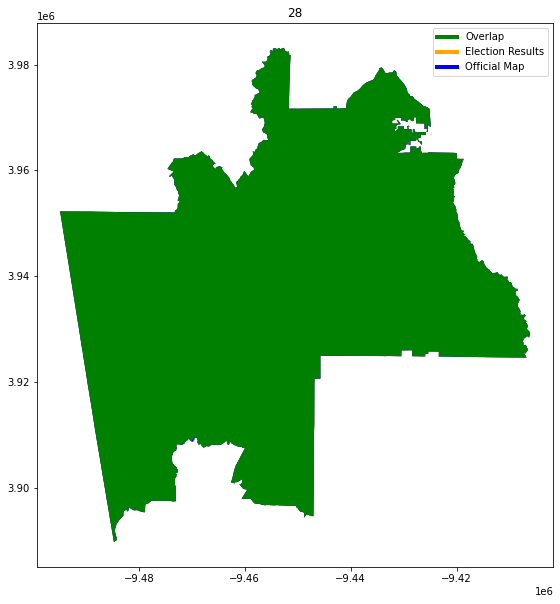

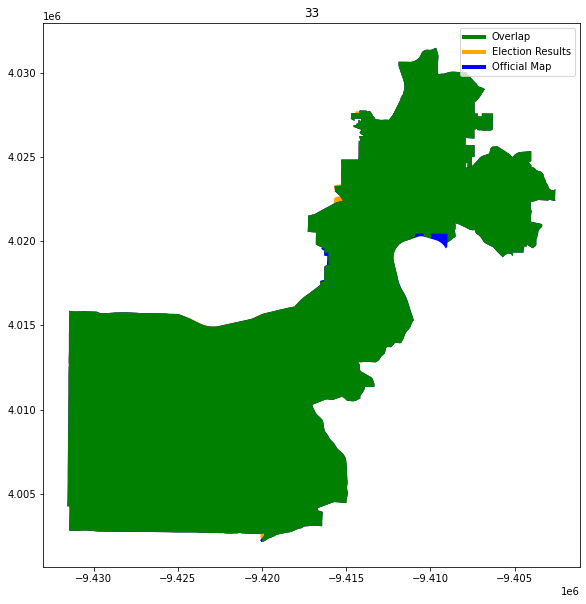

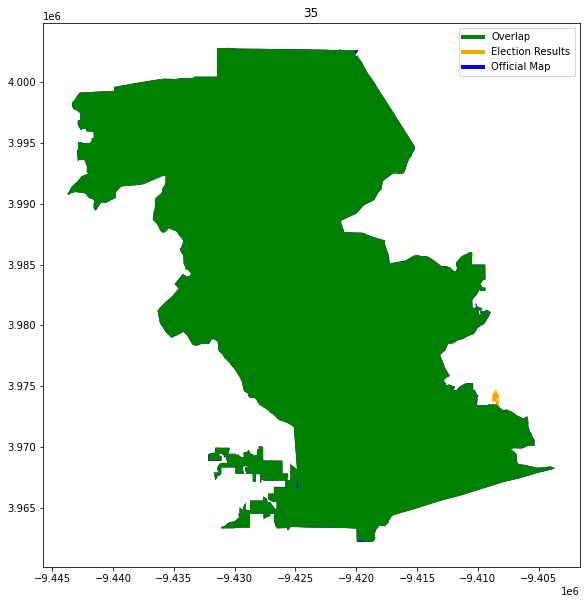

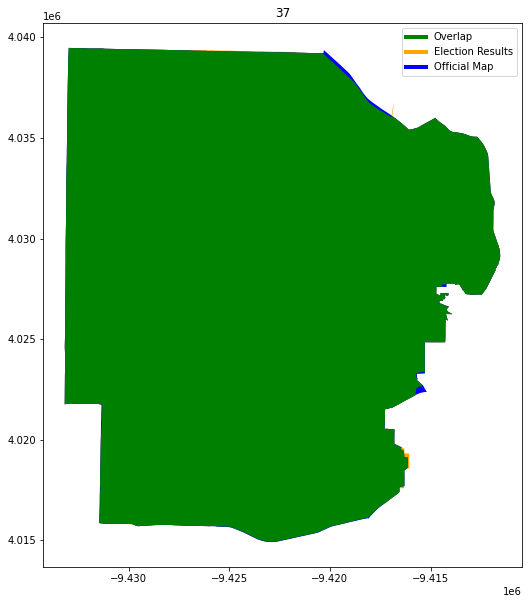

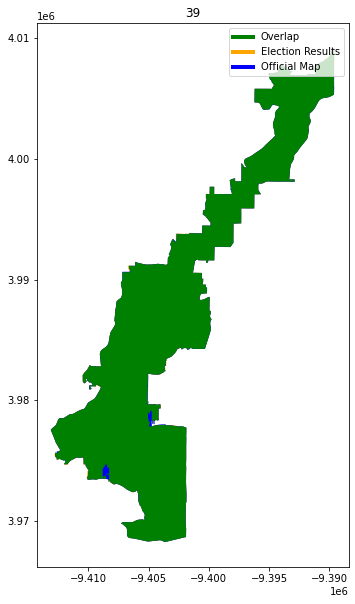

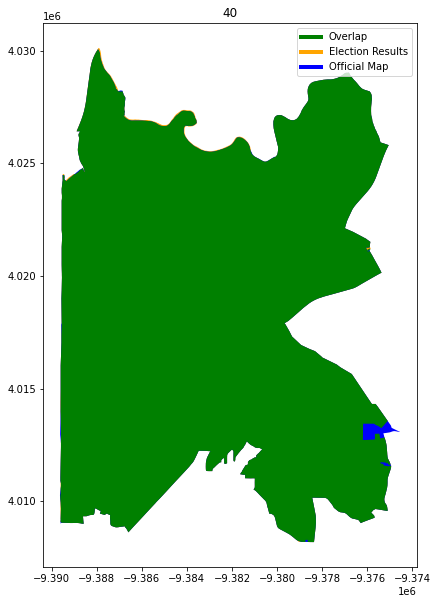

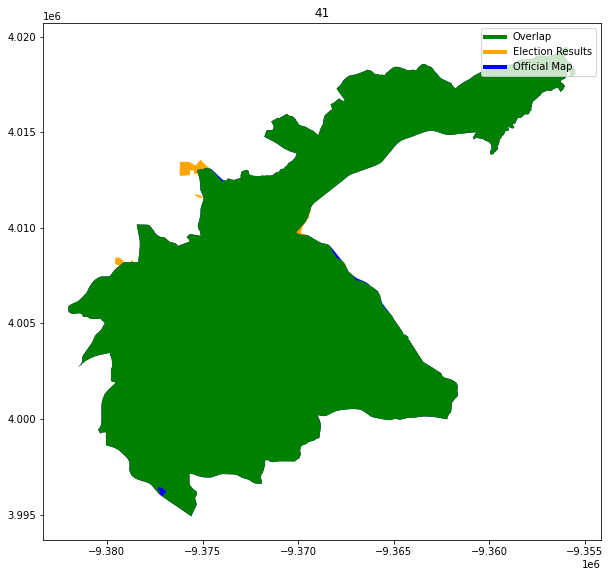

In [51]:
helper_functions.compare_geometries(assigned_districts, ga_sldu_districts ,"Election Results", "Official Map", "SLDU_DIST",area_threshold=.1)

## Check Added Column Totals

In the 'statewide-county-totals-check-erj' we created a cleaned csv of the county totals from the GA sos website

In [52]:
official_county_totals = pd.read_csv("./cleaned_official_county_totals.csv")

In [53]:
helper_functions.statewide_totals_check(official_county_totals, "Official Totals", join_attempt_1, "ERJ Totals", races)

***Statewide Totals Check***
GSU01RWAT has a difference of 73 votes
	Official Totals: 72192 votes
	ERJ Totals: 72119 votes
GSU02DJAC is equal 	 both dataframes 62334
GSU03RMCN is equal 	 both dataframes 63891
GSU04RHIC is equal 	 both dataframes 65492
GSU05DRAH is equal 	 both dataframes 44991
GSU06DJOR is equal 	 both dataframes 62148
GSU06RLAN is equal 	 both dataframes 38891
GSU07RHAR has a difference of 107 votes
	Official Totals: 56433 votes
	ERJ Totals: 56326 votes
GSU08DGEA is equal 	 both dataframes 26819
GSU08RGOO is equal 	 both dataframes 43324
GSU09DMER is equal 	 both dataframes 53941
GSU09RMAR is equal 	 both dataframes 49879
GSU10DJON is equal 	 both dataframes 84994
GSU11RBUR is equal 	 both dataframes 57018
GSU12DSIM is equal 	 both dataframes 40396
GSU12RTAY is equal 	 both dataframes 22546
GSU13DEGL is equal 	 both dataframes 21178
GSU13RSUM is equal 	 both dataframes 48153
GSU14DJOH has a difference of 86 votes
	Official Totals: 28505 votes
	ERJ Totals: 28419 votes


In [54]:
ga_election["CTYNAME"] = ga_election["county"].str.upper()

## Check whether the differences above were introduced from the precinct splits

Note: It appears as though they were

In [55]:
helper_functions.statewide_totals_check(official_county_totals, "Official Totals", ga_election, "Pre-Split Totals", races)

***Statewide Totals Check***
GSU01RWAT is equal 	 both dataframes 72192
GSU02DJAC is equal 	 both dataframes 62334
GSU03RMCN is equal 	 both dataframes 63891
GSU04RHIC is equal 	 both dataframes 65492
GSU05DRAH is equal 	 both dataframes 44991
GSU06DJOR is equal 	 both dataframes 62148
GSU06RLAN is equal 	 both dataframes 38891
GSU07RHAR is equal 	 both dataframes 56433
GSU08DGEA is equal 	 both dataframes 26819
GSU08RGOO is equal 	 both dataframes 43324
GSU09DMER is equal 	 both dataframes 53941
GSU09RMAR is equal 	 both dataframes 49879
GSU10DJON is equal 	 both dataframes 84994
GSU11RBUR is equal 	 both dataframes 57018
GSU12DSIM is equal 	 both dataframes 40396
GSU12RTAY is equal 	 both dataframes 22546
GSU13DEGL is equal 	 both dataframes 21178
GSU13RSUM is equal 	 both dataframes 48153
GSU14DJOH is equal 	 both dataframes 28505
GSU14RTHO is equal 	 both dataframes 66534
GSU15DHAR is equal 	 both dataframes 48998
GSU16DJES is equal 	 both dataframes 30643
GSU16RHAR is equal 	 both

## Check Column Totals - County Level

In [56]:
official_county_totals["CTYNAME"] = official_county_totals["county"].str.upper()

In [57]:
helper_functions.county_totals_check(official_county_totals, "Official Totals", join_attempt_1, "ERJ Totals", races, "CTYNAME")

***Countywide Totals Check***

GSU01RWAT contains differences in these counties:
	LIBERTY has a difference of 73 votes
		Official Totals: 10835 votes
		ERJ Totals: 10762 votes
GSU02DJAC is equal across all counties
GSU03RMCN is equal across all counties
GSU04RHIC is equal across all counties
GSU05DRAH is equal across all counties
GSU06DJOR is equal across all counties
GSU06RLAN is equal across all counties
GSU07RHAR contains differences in these counties:
	WILCOX has a difference of 107 votes
		Official Totals: 1217 votes
		ERJ Totals: 1110 votes
GSU08DGEA is equal across all counties
GSU08RGOO is equal across all counties
GSU09DMER is equal across all counties
GSU09RMAR is equal across all counties
GSU10DJON is equal across all counties
GSU11RBUR is equal across all counties
GSU12DSIM is equal across all counties
GSU12RTAY is equal across all counties
GSU13DEGL is equal across all counties
GSU13RSUM is equal across all counties
GSU14DJOH contains differences in these counties:
	BARTOW

In [58]:
helper_functions.county_totals_check(official_county_totals, "Official Totals", ga_election, "Pre-Split Totals", races, "CTYNAME")

***Countywide Totals Check***

GSU01RWAT is equal across all counties
GSU02DJAC is equal across all counties
GSU03RMCN is equal across all counties
GSU04RHIC is equal across all counties
GSU05DRAH is equal across all counties
GSU06DJOR is equal across all counties
GSU06RLAN is equal across all counties
GSU07RHAR is equal across all counties
GSU08DGEA is equal across all counties
GSU08RGOO is equal across all counties
GSU09DMER is equal across all counties
GSU09RMAR is equal across all counties
GSU10DJON is equal across all counties
GSU11RBUR is equal across all counties
GSU12DSIM is equal across all counties
GSU12RTAY is equal across all counties
GSU13DEGL is equal across all counties
GSU13RSUM is equal across all counties
GSU14DJOH is equal across all counties
GSU14RTHO is equal across all counties
GSU15DHAR is equal across all counties
GSU16DJES is equal across all counties
GSU16RHAR is equal across all counties
GSU17DROS is equal across all counties
GSU17RSTR is equal across all cou

## Prepare to Export

In [59]:
join_attempt_1.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'DISTRICT', 'CTYSOSID', 'PRECINCT_I',
       'PRECINCT_N', 'CTYNAME', 'CTYNUMBER', 'CTYNUMBER2', 'FIPS2',
       'SLDU_DIST', 'GSU01RWAT', 'GSU02DJAC', 'GSU03RMCN', 'GSU04RHIC',
       'GSU05DRAH', 'GSU06DJOR', 'GSU06RLAN', 'GSU07RHAR', 'GSU08DGEA',
       'GSU08RGOO', 'GSU09DMER', 'GSU09RMAR', 'GSU10DJON', 'GSU11RBUR',
       'GSU12DSIM', 'GSU12RTAY', 'GSU13DEGL', 'GSU13RSUM', 'GSU14DJOH',
       'GSU14RTHO', 'GSU15DHAR', 'GSU16DJES', 'GSU16RHAR', 'GSU17DROS',
       'GSU17RSTR', 'GSU18RKEN', 'GSU19RTIL', 'GSU20DJOH', 'GSU20RWAL',
       'GSU21RBEA', 'GSU22DJON', 'GSU23DSMI', 'GSU23RBUR', 'GSU24RAND',
       'GSU25DBRI', 'GSU25RJON', 'GSU26DLUC', 'GSU27DGRI', 'GSU27RDOL',
       'GSU28RBRA', 'GSU29RROB', 'GSU30DEDW', 'GSU30RDUG', 'GSU31DSMI',
       'GSU31RANA', 'GSU32DTRI', 'GSU32RKIR', 'GSU33DRHE', 'GSU34DSEA',
       'GSU35DJAM', 'GSU36DORR', 'GSU37DPAR', 'GSU37RTIP', 'GSU38DTAT',
       'GSU40DHAR', 'GSU40RGUA', 'GSU41DJAC', 'GSU41RFRE', 'GSU42DPAR'

In [60]:
join_attempt_1.to_file("./ga_gen_20_prec/ga_gen_20_sldu_prec.shp")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
